In [9]:
#r "..\Statsetera\bin\Debug\net6.0\Statsetera.dll"
#r "nuget:MathNet.Numerics"
// Install the ScottPlot NuGet package
#r "nuget:ScottPlot"
using MathNet.Numerics.Random;
using Statsetera;

// Setup a custom formatter to display plots as images
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (plt, writer) => 
    writer.Write(((ScottPlot.Plot)plt).GetImageHTML()), HtmlFormatter.MimeType);

Installed Packages MathNet.Numerics, 5.0.0 ScottPlot, 4.1.61

Generate 100 observations from standard normal N(0, 1)

In [10]:
using MathNet.Numerics.Distributions;
RandomSource rng = new MersenneTwister();
int n = 100;
var samples = Normal.Samples(rng, 0, 1).Take(n);



Construct cdf F and compute 95% confidence band

In [11]:
var F = Stats.EmpiricalDistributionFunction(samples);
var alpha = 0.05;
var x = Enumerable.Range(-40000, 80000).Select(x => (double)x/10000);
var y = x.Select(x => (F(x, alpha), Normal.CDF(0, 1, x))).Accumulate(
    (0.0, 0.0, 0.0, 0.0, 0, 0), (acc, i) => 
    {
        var predicted = i.Item1.Item1;
        var lower = i.Item1.Item2;
        var upper = i.Item1.Item3;
        var expected = i.Item2;
        var inside = (lower <= expected && expected <= upper) ? 
            acc.Item5 + 1 : acc.Item5;
        var n = acc.Item6 + 1;
        return (predicted, lower, upper, expected, inside, n);
    }
);
var last = y.Last();
(last, last.Item5/last.Item6)

Item1,Item2
"( 1, 0.864189848425938, 1, 0.9999683153724673, 80000, 80000 )",1


Plotting the function and its confidence interval


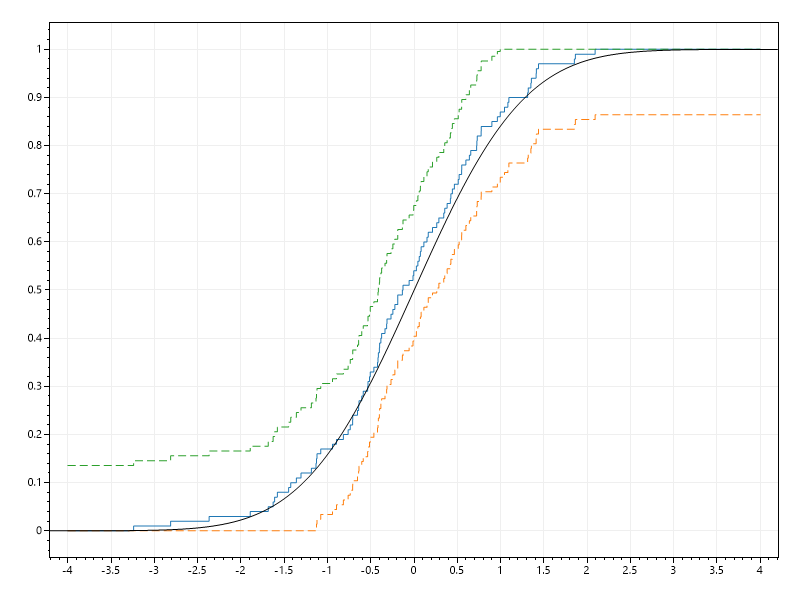

In [12]:
using ScottPlot;
var plt = new ScottPlot.Plot(800, 600);
(var predicted, var lower, var upper, _, _, _) = y.Unzip();
plt.AddScatterLines(x.ToArray(), predicted.ToArray());
plt.AddScatterLines(x.ToArray(), lower.ToArray(), lineStyle: LineStyle.Dash);
plt.AddScatterLines(x.ToArray(), upper.ToArray(), lineStyle: LineStyle.Dash);
plt.AddFunction(x => Normal.CDF(0, 1, x), color: System.Drawing.Color.Black);
plt